<div style="background-color:#e6f4ea; padding:15px; border:4px solid #40916c; border-radius:2px;margin:auto;">

<h1 style="color:#00A562; text-align:center;">Glassdoor Employee Reviews Analysis</h1>
<h3 style="text-align:center;">Exploratory Data Analysis using Python (Pandas)</h3>

<p style="text-align:center; font-size:16px;">
Analyzing real employee reviews from Glassdoor to uncover insights about workplace satisfaction, company reputation, and management performance.
</p>

</div>


<div style=" padding:15px; border-left:6px solid #40916c; border-radius:4px;">
  <h1 style="margin-top:0; color:#2c3e50;"> 1. Importing Libraries</h1>
    <p style="font-size:16px;">
      We'll start by importing the essential Python libraries required for data analysis.
     </p>

</div>

In [511]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re
from IPython.display import display

<div style=" padding:15px; border-left:6px solid #40916c; border-radius:4px;">
  <h1 style="margin-top:0; color:#2c3e50;"> 2. Loading the Dataset</h1>
    <p style="font-size:16px;">
      Let's load our dataset from the CSV file into a Pandas DataFrame and preview the first few rows to understand its structure.
     </p>

</div>

In [6]:
reviews_csv='glassdoor_reviews.csv'
reviews_df= pd.read_csv(reviews_csv) #load the excel file

In [7]:
#Display first 5 rows
reviews_df.head() 

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


In [8]:
# Display total rows and columns
reviews_df.shape 

(838566, 18)

<div style=" padding:15px; border-left:6px solid #40916c; border-radius:4px;">
  <h1 style="margin-top:0; color:#2c3e50;"> 3. Creating a Working Copy</h1>
    <p style="font-size:16px;">
      To keep the original data safe, we'll create a copy named `df` that we’ll use for all data cleaning and analysis.
     </p>

</div>

In [10]:
df= reviews_df #it's like creating a copyfor analysis and keep the original one "reviews_df"
df.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


<div style=" padding:15px; border-left:6px solid #40916c; border-radius:4px;">
  <h1 style="margin-top:0; color:#2c3e50;"> 4. Data Cleaning and Preparation</h1>
    <p style="font-size:16px;">
      Before analyzing, we’ll check for missing values, duplicates, and incorrect data types to ensure data quality.
     </p>

</div>

In [12]:
# Check missing values in each column
df.isnull().sum().sort_values(ascending=False) 

diversity_inclusion    702500
location               297343
culture_values         191373
senior_mgmt            155876
comp_benefits          150082
work_life_balance      149894
career_opp             147501
headline                 2590
cons                       13
pros                        2
date_review                 0
overall_rating              0
current                     0
recommend                   0
ceo_approv                  0
outlook                     0
job_title                   0
firm                        0
dtype: int64

In [13]:
#Display total number of nulll values as %
df.isnull().mean().sort_values(ascending=False) *100 

diversity_inclusion    83.773967
location               35.458509
culture_values         22.821459
senior_mgmt            18.588400
comp_benefits          17.897458
work_life_balance      17.875039
career_opp             17.589671
headline                0.308861
cons                    0.001550
pros                    0.000239
date_review             0.000000
overall_rating          0.000000
current                 0.000000
recommend               0.000000
ceo_approv              0.000000
outlook                 0.000000
job_title               0.000000
firm                    0.000000
dtype: float64

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
  <p style="font-size:16px;">
  Several satisfaction-related columns have missing values:
  <b>culture_values, senior_mgmt, comp_benefits, work_life_balance,</b> and <b>career_opp</b>.<br>
  We'll fill them using the average for the same firm and job title to preserve context:
  </p>
</div>

In [15]:
# List of columns to fill
cols_to_fill = ['culture_values', 'senior_mgmt', 'comp_benefits', 'work_life_balance', 'career_opp']

In [16]:
# 1. Compute firm + job title level averages
means_df = df.groupby(['firm', 'job_title'])[cols_to_fill].mean()

# 2. Merge these averages into the main DataFrame
df = df.merge(means_df, on=['firm', 'job_title'], suffixes=('', '_mean'))

# 3. Fill missing values using the corresponding group mean
for col in cols_to_fill:
    df[col] = df[col].fillna(df[f'{col}_mean'])

# 4. Remove the temporary mean columns
df.drop(columns=[f'{col}_mean' for col in cols_to_fill], inplace=True)

In [17]:
# Check remaining missing values
df.isnull().mean().sort_values(ascending=False) *100 

diversity_inclusion    83.773967
location               35.458509
culture_values          2.443338
senior_mgmt             2.027986
comp_benefits           1.957985
work_life_balance       1.949519
career_opp              1.914101
headline                0.308861
cons                    0.001550
pros                    0.000239
date_review             0.000000
overall_rating          0.000000
current                 0.000000
recommend               0.000000
ceo_approv              0.000000
outlook                 0.000000
job_title               0.000000
firm                    0.000000
dtype: float64

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
  <p style="color:#00A562; font-size:16px;">
  Now, fill any remaining missing values using <b>firm-level averages</b> (in case job-title data is too specific):
  </p>
</div>

In [19]:
# 1. Compute firm-level averages
means_df = df.groupby('firm')[cols_to_fill].mean()

# 2. Merge firm averages into main DataFrame
df = df.merge(means_df, on='firm', suffixes=('', '_mean'))

# 3. Fill missing values using firm-level means
for col in cols_to_fill:
    df[col] = df[col].fillna(df[f'{col}_mean'])

# 4. Remove temporary columns
df.drop(columns=[f'{col}_mean' for col in cols_to_fill], inplace=True)

In [20]:
# Check missing values again
df.isnull().mean().sort_values(ascending=False) *100 

diversity_inclusion    83.773967
location               35.458509
headline                0.308861
cons                    0.001550
pros                    0.000239
comp_benefits           0.000000
outlook                 0.000000
ceo_approv              0.000000
recommend               0.000000
senior_mgmt             0.000000
firm                    0.000000
date_review             0.000000
culture_values          0.000000
work_life_balance       0.000000
overall_rating          0.000000
current                 0.000000
job_title               0.000000
career_opp              0.000000
dtype: float64

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
  <p style="color:#00A562; font-size:16px;">
  Next, let's check and remove duplicate rowsr to ensure data integrity:
  </p>
</div>

In [22]:
df.duplicated().sum() 

33515

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum() 

0

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <p style=" color:#00A562; font-size:16px;">
          Finally, check data types and correct them where necessary:
     </p>

In [26]:
# Convert satisfaction columns to integers (rounded from float)
df[cols_to_fill]=df[cols_to_fill].astype(int)

# Convert date column to datetime format
df['date_review'] = pd.to_datetime(df['date_review'])

# Verify final data types
df.dtypes

firm                           object
date_review            datetime64[ns]
job_title                      object
current                        object
location                       object
overall_rating                  int64
work_life_balance               int32
culture_values                  int32
diversity_inclusion           float64
career_opp                      int32
comp_benefits                   int32
senior_mgmt                     int32
recommend                      object
ceo_approv                     object
outlook                        object
headline                       object
pros                           object
cons                           object
dtype: object

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <p style=" color:#00A562; font-size:16px;">
          <b>Note: we decide to just ignore two columns instade of deleting them ("diversity_inclusion" and "location ") </b>
     </p>

<div style=" padding:15px; border-left:6px solid #40916c; border-radius:4px;">
  <h1 style="margin-top:0; color:#2c3e50;"> 5. Exploratory Data Analysis (EDA)</h1>
    <p style="font-size:16px;">
      In this section, we’ll explore our data to uncover insights, patterns, and relationships between variables.
     </p>
</div>

In [29]:
df.shape

(805051, 18)

In [30]:
#the time bond for the data
df['date_review'].sort_values()

28080    2008-01-31
286126   2008-02-05
286127   2008-02-11
28081    2008-02-14
286128   2008-02-14
            ...    
231497   2021-06-07
805921   2021-06-07
799810   2021-06-07
800875   2021-06-07
746411   2021-06-08
Name: date_review, Length: 805051, dtype: datetime64[ns]

In [31]:
df.groupby('firm')['firm'].count().reset_index(name='count').sort_values(by='count', ascending=False)

,firm,count
179,IBM,49293
229,McDonald-s,49190
114,Deloitte,42909
127,EY,32217
286,PwC,32115
...,...,...
423,i-Net-Solution,4
170,Health-Protection-Agency,4
354,The-Survey-Association,3
248,NPSA,2


<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <p style=" color:#00A562; font-size:16px;">
          Add <b>"sector"</b> column based on firm mapping :
     </p>

In [33]:
sector_map = {
 # --- IT / Tech / Telecom ---
    'IBM': 'IT', 'Microsoft': 'IT', 'Apple': 'IT', 'Google': 'IT', 'Oracle': 'IT', 
    'SAP': 'IT', 'Salesforce': 'IT', 'Cisco-Systems': 'IT', 'Accenture': 'IT',
    'Wipro': 'IT', 'Unity-Technologies': 'IT', 'Workday': 'IT', 'Vodafone': 'Telecom',
    'BT': 'Telecom', 'Sky': 'Telecom', 'VMware': 'IT', 'Sage': 'IT', 'CityFibre': 'Telecom',
    'Colt-Technology-Services': 'Telecom', 'Dynatrace': 'IT', 'i-Net-Solution': 'IT',
    'LinkedIn': 'IT', 'Facebook': 'IT', 'Indeed': 'IT', 'Square-Enix': 'IT',
    'The-Access-Group-UK': 'IT', 'Hitachi-Capital-UK': 'IT', 'BayWa-r-e-renewable-energy': 'IT',
    'Northern-Gas-and-Power': 'Energy', 'Cougar-Mountain': 'IT',

       # --- Finance / Banking / Insurance ---
    'Deloitte': 'Finance', 'EY': 'Finance', 'PwC': 'Finance', 'KPMG': 'Finance',
    'J-P-Morgan': 'Finance', 'Citi': 'Finance', 'HSBC-Holdings': 'Finance', 
    'Barclays': 'Finance', 'American-Express': 'Finance', 'Morgan-Stanley': 'Finance',
    'Goldman-Sachs': 'Finance', 'BNY-Mellon': 'Finance', 'Deutsche-Bank': 'Finance',
    'Lloyds-Banking-Group': 'Finance', 'Santander': 'Finance', 'Nationwide-Building-Society': 'Finance',
    'Aviva': 'Finance', 'AXA-UK': 'Finance', 'Mastercard': 'Finance', 'Capital-Group': 'Finance',
    'Standard-Life-Aberdeen': 'Finance', 'Metro-Bank': 'Finance', 'BNP-Paribas': 'Finance',
    'Legal-and-General': 'Finance', 'Brewin-Dolphin': 'Finance', 'Rathbone-Brothers': 'Finance',
    'Skipton-Building-Society': 'Finance', 'Scottish-Widows': 'Finance', 'Curtis-Banks': 'Finance',
    'LV': 'Finance', 'St-James-s-Place-Wealth-Management': 'Finance',
    'AFH-Wealth-Management': 'Finance', 'AJ-Bell': 'Finance', 'Reassured': 'Finance',
    'Aon': 'Finance', 'Equiniti': 'Finance', 'Ryan-LLC': 'Finance', 'Wise': 'Finance',
    
# --- Food / Restaurants ---
    'McDonald-s': 'Food', 'Pizza-Hut': 'Food', 'Nando-s-UK-and-IRE': 'Food',
    'Compass-Group': 'Food', 'Sodexo': 'Food', 'Whitbread': 'Hospitality',
    'Premier-Inn': 'Hospitality', 'Travelodge-Hotels-UK': 'Hospitality',
    'IHG-Hotels-and-Resorts': 'Hospitality', 'Crowne-Plaza-Hotels-and-Resorts': 'Hospitality',
    'Holiday-Inn': 'Hospitality', 'Holiday-Inn-Express': 'Hospitality',
    'Marriott-International': 'Hospitality', 'Hilton': 'Hospitality',
    'Dalata-Hotel-Group': 'Hospitality', 'Jurys-Inns': 'Hospitality',
    'Best-Western': 'Hospitality', 'Novotel-Hotels': 'Hospitality', 'Hyatt': 'Hospitality',
    'Macdonald-Hotels-and-Resorts': 'Hospitality', 'Leonardo-Hotels': 'Hospitality',
    'Malmaison': 'Hospitality', 'Radisson-Hotel-Group': 'Hospitality',
    'Grange-Hotels': 'Hospitality', 'The-Ivy-Collection': 'Hospitality',

    # --- Retail / Fashion / Consumer Goods ---
    'Tesco': 'Retail', 'J-Sainsbury': 'Retail', 'Sainsbury-s': 'Retail',
    'ASDA': 'Retail', 'Primark': 'Retail', 'Marks-and-Spencer': 'Retail',
    'Boots': 'Retail', 'Boots-Opticians': 'Retail', 'Waitrose': 'Retail',
    'Lidl': 'Retail', 'ALDI': 'Retail', 'Morrisons': 'Retail',
    'B-and-M-Retail': 'Retail', 'B-and-Q': 'Retail', 'Co-op': 'Retail',
    'Next': 'Retail', 'Topshop': 'Retail', 'River-Island-Clothing': 'Retail',
    'Burberry': 'Retail', 'Harrods': 'Retail', 'Harvey-Nichols': 'Retail',
    'Missguided': 'Retail', 'Arcadia': 'Retail', 'Oliver-Bonas': 'Retail',
    'The-White-Company': 'Retail', 'YOOX-NET-A-PORTER-GROUP': 'Retail',
    'H-and-M': 'Retail', 'Mountain-Warehouse': 'Retail', 'WHSmith': 'Retail',
    'The-Range': 'Retail', 'ScS-Sofas': 'Retail', 'DFS-Furniture': 'Retail',
    'BHS': 'Retail', 'Debenhams': 'Retail', 'ASOS': 'Retail', 'JD-Sports': 'Retail',
    
    # --- Consumer Goods / FMCG ---
    'Unilever': 'Consumer Goods', 'Diageo': 'Consumer Goods', 'BAT': 'Consumer Goods',
    'GlaxoSmithKline': 'Pharmaceuticals', 'AstraZeneca': 'Pharmaceuticals',
    'The-LEGO-Group': 'Consumer Goods', 'The-Body-Shop': 'Consumer Goods',
    'Pernod-Ricard': 'Consumer Goods', 'Heineken': 'Consumer Goods',
    'Sainsbury-s-Bank': 'Finance', 'British-American-Tobacco': 'Consumer Goods',
# Healthcare / Pharmaceuticals / Hospitals
     'Bupa': 'Healthcare', 'Spire-Healthcare': 'Healthcare', 'Four-Seasons-Health-Care': 'Healthcare',
    'NHS': 'Healthcare', 'Barchester-Healthcare': 'Healthcare', 'Priory-Group': 'Healthcare',
    'Vets4Pets': 'Healthcare', 'Babylon-Health': 'Healthcare', 'Cygnet-Health-Care': 'Healthcare',
    'NHS-England': 'Healthcare', 'NHS-Professionals': 'Healthcare', 'The-Royal-Marsden-NHS-Foundation-Trust': 'Healthcare',
    'Betsi-Cadwaladr-University-Health-Board': 'Healthcare', 'Abertawe-Bro-Morgannwg-University-Health-Board': 'Healthcare',
    'University-Hospitals-of-Leicester': 'Healthcare', 'University-College-London-Hospitals': 'Healthcare',
    'HC-One': 'Healthcare', 'Active-Care-Group': 'Healthcare', 'Spire-Healthcare': 'Healthcare',

#Education / Universities / Colleges
'University-of-Cambridge': 'Education', 'University-of-Oxford': 'Education', 'Imperial-College-London': 'Education',
    'University-College-London': 'Education', 'University-of-Manchester': 'Education', 'University-of-Leeds': 'Education',
    'University-of-Birmingham': 'Education', 'University-of-Bristol': 'Education', 'University-of-Nottingham': 'Education',
    'University-of-Glasgow': 'Education', 'University-of-Edinburgh': 'Education', 'University-of-Warwick': 'Education',
    'LSE': 'Education', 'King-s-College-London': 'Education', 'University-of-York': 'Education',
    'University-of-Bath': 'Education', 'University-of-Sheffield': 'Education', 'University-of-Hull': 'Education',
    'University-of-Durham': 'Education', 'University-of-Liverpool': 'Education', 'University-of-Leicester': 'Education',
    'University-of-Southampton': 'Education', 'University-of-Manchester': 'Education', 'University-of-Newcastle-UK': 'Education',
    'University-of-Reading': 'Education', 'University-of-Strathclyde': 'Education', 'University-of-the-Arts-London': 'Education',
    'University-of-the-West-of-England': 'Education', 'University-of-Bradford': 'Education',
    'University-of-Huddersfield': 'Education', 'Birmingham-City-University': 'Education', 'Lancaster-University': 'Education',
    'Queen-s-University-Belfast': 'Education', 'Birkbeck-College': 'Education', 'Imperial-College-London': 'Education',
    'Oxford-University-Press': 'Education', 'Cambridge-Assessment': 'Education', 'The-Open-University': 'Education',

#Government / Public Sector / Non-Profit
    'HM-Treasury': 'Government', 'HM-Prison-Service': 'Government', 'UK-Ministry-of-Defence': 'Government',
    'Department-of-Health-UK': 'Government', 'Department-for-Work-And-Pensions': 'Government',
    'Civil-Service-United-Kingdom': 'Government', 'Her-Majesty-s-Revenue-and-Customs': 'Government',
    'The-British-Army': 'Government', 'Public-Health-England': 'Government', 'Scottish-Government': 'Government',
    'Foreign-and-Commonwealth-Office': 'Government', 'Office-for-National-Statistics': 'Government',
    'National-Offender-Management-Service': 'Government', 'Ministry-of-Justice-UK': 'Government',
    'Scottish-Courts-and-Tribunals-Service': 'Government', 'UK-Border-Agency': 'Government',
    'Department-of-Education-UK': 'Government', 'Home-Office': 'Government', 'Transport-for-London': 'Government',
    'UK-Atomic-Energy-Authority': 'Government', 'National-Institute-for-Health-and-Care-Excellence': 'Government',
    'The-Salvation-Army': 'Non-Profit', 'British-Red-Cross': 'Non-Profit', 'Age-UK-The-National-Charity': 'Non-Profit',
    'ENABLE-Scotland': 'Non-Profit', 'Sport-England': 'Non-Profit',
## more
     'AQA': 'Education',
    'Abcam': 'Pharmaceuticals',
    'Accor': 'Hospitality',
    'Achieving-for-Children': 'Non-Profit',
    'ActionCOACH': 'Consulting',
    'Adecco': 'Staffing',
    'AlixPartners': 'Consulting',
    'Amey': 'Infrastructure',
    'Angard-Staffing': 'Staffing',
    'Anglian-Water': 'Utilities',
    'Anglo-American': 'Energy',
    'Animal-and-Plant-Health-Agency': 'Government',
    'Arnold-Clark': 'Retail',
    'BBC': 'Media',
    'BDO': 'Consulting',
    'BIS': 'Government',
    'BP': 'Energy',
    'BPP-Holdings': 'Education',
    'Babcock-International-Group': 'Infrastructure',
    'Bain-and-Company': 'Consulting',
    'Balfour-Beatty': 'Infrastructure',
    'Bannatyne-Group': 'Healthcare',
    'Barnardo-s': 'Non-Profit',
    'Barnet-and-Chase-Farm-Hospitals-NHS-Trust': 'Healthcare',
    'Barnett-Waddingham': 'Consulting',
    'Barratt-Developments': 'Infrastructure',
    'Barts-Health-NHS-Trust': 'Healthcare',
    'Bayer': 'Pharmaceuticals',
    'Bill-and-Melinda-Gates-Foundation': 'Non-Profit',
    'Bloomberg-L-P': 'Media',
    'Blue-Arrow': 'Staffing',
    'Blue-Yonder': 'IT',
    'Booking-com': 'Hospitality',
    'Boston-Consulting-Group': 'Consulting',
    'British-Airways': 'Transport',
    'Brook-Street': 'Staffing',
    'Bullhorn': 'IT',
    'CBRE': 'Real Estate',
    'CVS-Group': 'Retail',
    'Capita': 'Consulting',
    'CarShop-UK': 'Retail',
    'Cardiff-University': 'Education',
    'Care-UK': 'Healthcare',
    'Career-Legal': 'Staffing',
    'Christie-s': 'Retail',
    'Citizens-Advice': 'Non-Profit',
    'Colosseum-Dental': 'Healthcare',
    'Communities-and-Local-Government': 'Government',
    'Companies-House': 'Government',
    'Countrywide-plc': 'Real Estate',
    'Covea-Insurance': 'Finance',
    'Coventry-University': 'Education',
    'Creative-Support': 'Non-Profit',
    'Cromwell-Tools': 'Retail',
    'Crown-Prosecution-Service': 'Government',
    'Cushman-and-Wakefield': 'Real Estate',
    'DFID': 'Government',
    'DHL-Supply-Chain': 'Transport',
    'DPDgroup': 'Transport',
    'DWF': 'Consulting',
    'David-Lloyd-Leisure': 'Hospitality',
    'Diligenta': 'Consulting',
    'Dixons-Carphone': 'Retail',
    'Doubletree-By-Hilton': 'Hospitality',
    'Durham-County-Council': 'Government',
    'EBRD': 'Finance',
    'ENGIE': 'Energy',
    'East-Sussex-County-Council': 'Government',
    'Egon-Zehnder': 'Consulting',
    'Engineering-and-Physical-Sciences-Research-Council': 'Government',
    'Eversheds-Sutherland': 'Consulting',
    'Everyone-Active': 'Hospitality',
    'FARFETCH': 'Retail',
    'FYXER': 'Staffing',
    'FirstPort': 'Real Estate',
    'Foxtons': 'Real Estate',
    'Freshfields-Bruckhaus-Deringer': 'Consulting',
    'GLL': 'Hospitality',
    'GTR-Govia-Thameslink-Railway': 'Transport',
    'Gateley': 'Consulting',
    'Gi-Group': 'Staffing',
    'Grant-Thornton': 'Consulting',
    'Grant-Thornton-UK-LLP': 'Consulting',
    'Grosvenor-Casinos': 'Hospitality',
    'Guardian-News-and-Media': 'Media',
    'Guy-s-and-St-Thomas-NHS-Foundation-Trust': 'Healthcare',
    'Gymbox': 'Hospitality',
    'HM-Courts-and-Tribunals-Service': 'Government',
    'HMCTS': 'Government',
    'Hampshire-County-Council': 'Government',
    'Harris-Federation': 'Education',
    'Hastings-Direct': 'Finance',
    'Hays': 'Staffing',
    'Health-Education-England': 'Healthcare',
    'Health-Protection-Agency': 'Government',
    'Home-Group': 'Non-Profit',
    'ISS-Facility-Services': 'Hospitality',
    'Immediate-Media-Company': 'Media',
    'Intelligent-Office-UK': 'Staffing',
    'Interserve': 'Infrastructure',
    'Iron-Mountain-Inc': 'IT',
    'Irwin-Mitchell': 'Consulting',
    'JLL': 'Real Estate',
    'JLT-Group': 'Finance',
    'JP-Boden-and-Co': 'Retail',
    'Jaguar-Land-Rover': 'Transport',
    'James-Hay-Partnership': 'Finance',
    'John-Lewis-and-Partners': 'Retail','KKR': 'Finance','Kent-County-Council': 'Government','Kier-Group': 'Infrastructure','Kingsley-Healthcare': 'Healthcare','Knight-Frank': 'Real Estate','Korn-Ferry': 'Consulting',
    'Kurt-Geiger': 'Retail','LGT-Group': 'Finance','Latham-and-Watkins': 'Consulting','Leaders-Romans-Group': 'Consulting',
    'Leeds-City-Council': 'Government','Link-Group': 'Finance','London-Underground': 'Transport','Loughborough-University': 'Education',
    'Manchester-Metropolitan-University': 'Education','Manpower': 'Staffing','McKinsey-and-Company': 'Consulting',
    'Mears': 'Infrastructure','Mercer': 'Consulting','Met-Office': 'Government','Michelmores': 'Consulting',
    'Mitie': 'Infrastructure','Moneypenny': 'Staffing','MyCSP': 'Government','NPSA': 'Government',
    'National-Star': 'Non-Profit', 'Network-Rail': 'Transport','New-Look': 'Retail',
    'Newcastle-Upon-Tyne-Hospitals-NHS': 'Healthcare','North-Yorkshire-County-Council': 'Government',
    'Northern-Ireland-Civil-Service': 'Government','Nuffield-Health': 'Healthcare','Odgers-Berndtson': 'Consulting',
    'Office-Angels': 'Staffing', 'Office-Concierge': 'Staffing', 'Office-of-Rail-Regulation': 'Government',
    'Oliver-Wyman': 'Consulting', 'Orbit-Group': 'Infrastructure',
    'Ordnance-Survey': 'Government', 'Oxford-University': 'Education',
    'Pearson': 'Education','Penderels-Trust': 'Non-Profit','Penguin-Random-House': 'Media',
    'People-Group': 'Staffing','Pertemps': 'Staffing', 'Portico': 'Staffing',
    'Post-Office': 'Government','REED': 'Staffing','RSM': 'Consulting',
    'RWE-Supply-and-Trading': 'Energy','Randstad': 'Staffing','Rapport-London': 'Staffing',
    'Rendall-and-Rittner': 'Staffing','Rentokil-Initial': 'Infrastructure','Robert-Walters': 'Staffing','Roche': 'Pharmaceuticals',
    'Rodericks-Dental': 'Healthcare','Royal-Mail': 'Transport', 'Rural-Payments-Agency': 'Government','SSE': 'Energy',
    'Sanctuary-Group': 'Non-Profit', 'Savills': 'Real Estate','Search-Consultancy': 'Consulting','Serco-Group': 'Consulting',
    'Somerset-County-Council': 'Government', 'Somerset-Partnership-NHS-Foundation-Trust': 'Healthcare','Sotheby-s': 'Retail',
    'Southern-Health-and-Social-Care-Trust': 'Healthcare','Specsavers': 'Retail','Student-Loans-Company': 'Government',
    'Surrey-County-Council': 'Government','Sytner': 'Retail','TLT': 'Consulting','TUI-Group': 'Hospitality',
    'Tate': 'Media','Tate-Recruitment': 'Staffing','Taylor-Wimpey': 'Infrastructure','Tengizchevroil': 'Energy',
    'The-Church-of-Jesus-Christ-of-Latter-day-Saints': 'Non-Profit', 'The-Coal-Authority': 'Government', 
    'The-Department-for-Education-UK': 'Government', 'The-London-Clinic': 'Healthcare','The-National-Gallery': 'Non-Profit',
    'The-Survey-Association': 'Consulting', 'Thomas-Cook': 'Hospitality','Thomson-Reuters': 'Media','Time-Etc': 'Staffing',
    'Tower-Hamlets-Council': 'Government', 'UHMBT': 'Healthcare','UKCIL': 'Non-Profit', 'United-Utilities': 'Utilities',
    'University-of-Michigan': 'Education','Valuation-Office-Agency': 'Government','Veolia': 'Utilities','Vets-Now': 'Healthcare',
    'Virgin-Active': 'Hospitality', 'Virgin-Media': 'Media','WLT-Group': 'Consulting', 'Wakefield-Council': 'Government',
    'Wellington-Management': 'Finance','West-Sussex-County-Council': 'Government','Western-Health-and-Social-Care-Trust': 'Healthcare',
    'Willis-Towers-Watson': 'Consulting','Willmott-Dixon': 'Infrastructure','XPO-Logistics': 'Transport',
    'XPS-Pensions-Group': 'Finance', 'ibis': 'Hospitality', 'mydentist-UK': 'Healthcare', 'next': 'Retail','the-LEGO-Group': 'Consumer Goods'
}


In [34]:
# Here, we assign each company to its corresponding sector using a predefined dictionary called `sector_map`.
df['sector'] = df['firm'].map(sector_map)
sector_summary = df.groupby('sector')['firm'].count().reset_index(name='count').sort_values(by='count', ascending=False)
sector_summary['percent%'] = (sector_summary['count'] / sector_summary['count'].sum()) * 100
sector_summary

,sector,count,percent%
4,Finance,260254,32.327641
9,IT,179543,22.302065
15,Retail,76968,9.560637
5,Food,63839,7.929808
0,Consulting,40910,5.081666
8,Hospitality,38902,4.832240
2,Education,26345,3.272463
11,Media,17281,2.146572
17,Telecom,15406,1.913668
13,Pharmaceuticals,14289,1.774919


In [35]:
selected_sectors = ['Food', 'Finance', 'Education']

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <p style=" color:#00A562; font-size:16px;">
          Add <b>"status"</b> column (Current or Former employee):
     </p>

In [43]:
df['current'].unique()

array(['Current Employee', 'Current Employee, more than 1 year',
       'Current Employee, less than 1 year', 'Former Employee',
       'Current Employee, more than 5 years',
       'Former Employee, more than 1 year',
       'Former Employee, more than 3 years',
       'Former Employee, more than 5 years',
       'Current Employee, more than 3 years',
       'Current Employee, more than 8 years',
       'Former Employee, less than 1 year',
       'Former Employee, more than 8 years',
       'Current Employee, more than 10 years',
       'Former Employee, more than 10 years',
       'Former Contractor, less than 1 year',
       'Former Intern, less than 1 year',
       'Current Contractor, less than 1 year', 'Former Contractor',
       'Former Intern, more than 1 year', 'Current Contractor',
       'Former Intern', 'Current Intern, less than 1 year',
       'Current Contractor, more than 1 year',
       'Former Contractor, more than 1 year',
       'Former Contractor, more than 8 years

In [391]:
def status_emp(s):
    if s.split()[0]== 'Current':
        return 'Current'
    else:
       return 'Former' 

df['status']=df['current'].apply(status_emp)

df['status'].value_counts() 

status
Current    471188
Former     333863
Name: count, dtype: int64

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <p style=" color:#00A562; font-size:16px;">
          Add <b>"years_emp"</b> column (How long the employee works):
     </p>

In [393]:
def yers_emp(s):
    if s.split()[-2] in '1 2 3 4 5 6 7 8 9 10':
        return int(s.split()[-2])
    else: 
         return 0 # 0 means we don't know how much (just to keep the column int type)

df['years_emp']=df['current'].apply(yers_emp)

df['years_emp']

0         0
1         1
2         1
3         0
4         1
         ..
838561    5
838562    1
838563    0
838564    1
838565    3
Name: years_emp, Length: 805051, dtype: int64

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <p style=" color:#00A562; font-size:16px;">
          <b>Analysis Begins: </b>
     </p>

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;">Overall rating Analysis by Sector</h2>
</div>

In [54]:
#Which sectors have higher employee ratings?:
# Pivot table: Average overall rating per sector
sector_pivot = df.pivot_table(
    index='sector',          # group by sector
    values='overall_rating', # column to aggregate
    aggfunc='mean'           # aggregation function
)
sector_pivot.sort_values(by='overall_rating', ascending=False)


,overall_rating
sector,
Utilities,4.019130
Education,3.943746
Consumer Goods,3.892722
IT,3.831032
Pharmaceuticals,3.760585
Finance,3.672251
Energy,3.662585
Hospitality,3.653385
Consulting,3.641164


In [55]:
sector_pivot.loc[selected_sectors, ['overall_rating']]

,overall_rating
sector,
Food,3.319601
Finance,3.672251
Education,3.943746


<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> Status rating Analysis by Sector</h2>
     </div>

In [57]:
#How many current vs ex-employees reviewed each sector?:
#Count of reviews by sector and employee status
status_by_sector = df.pivot_table(
    index='sector',
    columns='status',  # "Current Employee" or "Former Employee"
    values='overall_rating', # can use any column
    aggfunc='count',    # just count number of reviews
    fill_value=0
)
status_by_sector.sort_values(by='Current', ascending=False)
status_by_sector['Current_%'] = status_by_sector['Current'] / status_by_sector.sum(axis=1) * 100
status_by_sector['Former_%'] = status_by_sector['Former'] / status_by_sector.sum(axis=1) * 100
status_by_sector

status,Current,Former,Current_%,Former_%
sector,,,,
Consulting,24573,16337,60.065999,39.875454
Consumer Goods,4728,3708,56.045519,43.664391
Education,16567,9778,62.884798,37.026820
Energy,2011,1092,64.808250,34.471783
Finance,160125,100129,61.526432,38.464475
Food,25605,38234,40.108711,59.853684
Government,5983,3293,64.499784,35.255073
Healthcare,7199,3349,68.249905,31.545979
Hospitality,19480,19422,50.074546,49.861272


In [58]:
status_by_sector.loc[selected_sectors]

status,Current,Former,Current_%,Former_%
sector,,,,
Food,25605,38234,40.108711,59.853684
Finance,160125,100129,61.526432,38.464475
Education,16567,9778,62.884798,37.026820


In [59]:
# What is the average overall rating: Current vs Former employees?:
df.groupby('status')['overall_rating'].mean()

status
Current    3.811929
Former     3.438171
Name: overall_rating, dtype: float64

In [60]:
# Filter for selected sectors and compute the mean rating by status
avg_rating_status = (
    df[df['sector'].isin(selected_sectors)].groupby(['sector', 'status'])['overall_rating'].mean()
)

avg_rating_status

sector     status 
Education  Current    4.055592
           Former     3.754244
Finance    Current    3.774264
           Former     3.509113
Food       Current    3.461355
           Former     3.224669
Name: overall_rating, dtype: float64

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> Satisfaction by Category</h2>
</div>

In [64]:
# Which satisfaction dimensions score highest/lowest?
# for which category employees are most or least satisfied with:
df[cols_to_fill].mean().sort_values(ascending=False)

culture_values       3.479789
career_opp           3.373594
comp_benefits        3.318314
work_life_balance    3.283172
senior_mgmt          3.087452
dtype: float64

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> Recommendation Analysis by Sector </h2>
</div>

In [66]:
#How the overall satisfaction rating differs depending on whether employees would recommend their company to others?:
#Average overall rating by recommendation
df.groupby('recommend')['overall_rating'].mean()

recommend
o    3.735970
v    4.204435
x    2.225153
Name: overall_rating, dtype: float64

In [67]:
# Employee Recommendation Rate by Sector
recommend_by_sector = df.pivot_table(index='sector', 
                                     columns='recommend', 
                                     values='overall_rating', 
                                     aggfunc='count', fill_value=0)

# Calculate percentage of positive recommendations
recommend_by_sector['Positive_%'] = recommend_by_sector['v'] / recommend_by_sector.sum(axis=1) * 100
recommend_by_sector['Negative_%'] = recommend_by_sector['x'] / recommend_by_sector.sum(axis=1) * 100
recommend_by_sector['No_opinion_%'] = recommend_by_sector['o'] / recommend_by_sector.sum(axis=1) * 100
recommend_by_sector['total_reviews'] = recommend_by_sector[['o', 'v', 'x']].sum(axis=1)
filtered = recommend_by_sector[recommend_by_sector['total_reviews'] >= 5000]
recommend_by_sector.sort_values('Positive_%', ascending=False)

recommend,o,v,x,Positive_%,Negative_%,No_opinion_%,total_reviews
sector,,,,,,,
Utilities,59,405,111,70.434783,17.197710,8.903880,575
Consumer Goods,1735,5453,1248,64.639640,14.681248,20.375040,8436
Energy,555,1808,740,58.266194,23.408342,17.427213,3103
Pharmaceuticals,3307,8246,2736,57.708727,19.070576,23.019983,14289
IT,43254,103385,32904,57.582306,18.320653,24.080984,179543
Media,4124,9441,3716,54.632255,21.435619,23.759773,17281
Telecom,3451,8365,3590,54.297027,23.220770,22.288217,15406
Staffing,1993,5052,2283,54.159520,24.333417,21.187493,9328
Hospitality,9125,20604,9173,52.963858,23.547705,23.410335,38902


In [68]:
recommend_by_sector.loc[selected_sectors, ['Positive_%', 'Negative_%', 'No_opinion_%']]

recommend,Positive_%,Negative_%,No_opinion_%
sector,,,
Food,36.263099,28.211234,35.473815
Finance,50.950610,18.464113,30.573508
Education,48.221674,14.712111,36.951017


<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> CEO approv Analysis by Sector </h2>
</div>

In [74]:
# Employee opinions of CEO by Sector
ceo_by_sector = df.pivot_table(index='sector', 
                                     columns='ceo_approv', 
                                     values='overall_rating', 
                                     aggfunc='count', fill_value=0)

# Calculate percentage 
ceo_by_sector['Negative_%'] = ceo_by_sector['x'] / ceo_by_sector.sum(axis=1) * 100
ceo_by_sector['Positive_%'] = ceo_by_sector['v'] / ceo_by_sector.sum(axis=1) * 100
ceo_by_sector['mild_%'] = ceo_by_sector['r'] / ceo_by_sector.sum(axis=1) * 100
ceo_by_sector['No_opinion_%'] = ceo_by_sector['o'] / ceo_by_sector.sum(axis=1) * 100

ceo_by_sector.sort_values('Negative_%', ascending=False)

ceo_approv,o,r,v,x,Negative_%,Positive_%,mild_%,No_opinion_%
sector,,,,,,,,
Transport,3255,2635,2903,1591,15.321649,27.915282,25.270357,31.140854
Infrastructure,1314,1256,2027,571,11.048762,39.138461,24.069661,25.065540
Government,3847,2381,2027,1021,11.006900,21.826192,25.577857,41.213099
Non-Profit,2017,1082,1514,547,10.600775,29.280930,20.808166,38.634741
Energy,1136,632,1017,318,10.248147,32.666847,20.089545,35.881187
Retail,29291,21466,18665,7546,9.804074,24.247249,27.877179,38.025480
Healthcare,4689,2432,2441,986,9.347744,23.121337,22.985748,44.221436
IT,54080,28842,80136,16485,9.181645,44.631037,16.059305,30.109201
Media,5224,4202,6350,1505,8.708987,36.727050,24.251958,30.108316


In [75]:
ceo_by_sector.loc[selected_sectors, ['Positive_%', 'Negative_%', 'No_opinion_%', 'mild_%']]

ceo_approv,Positive_%,Negative_%,No_opinion_%,mild_%
sector,,,,
Food,19.293183,7.385767,44.452970,28.815164
Finance,34.510199,5.296749,39.668967,20.511053
Education,22.005562,7.428355,49.816140,20.626035


In [76]:
#Out of all reviews in each sector, what percentage of them are Anonymous Employees in each CEO approval category?
# Filter only selected sectors and where job_title contains "Anonymous Employee"
anon_df = df[
    (df['sector'].isin(selected_sectors)) &
    (df['job_title'].str.contains('Anonymous Employee', case=False, na=False))
]

# Count Anonymous Employees by sector and CEO approval type
anon_ceo_counts = anon_df.groupby(['sector', 'ceo_approv']).size().reset_index(name='count')

# Get total reviews per sector (including all employees)
sector_totals = (
    df[df['sector'].isin(selected_sectors)]
    .groupby('sector')
    .size()
    .reset_index(name='total_reviews')
)

#Merge totals with Anonymous counts
anon_ceo_counts = anon_ceo_counts.merge(sector_totals, on='sector', how='left')

# Calculate percentage per sector
anon_ceo_counts['percentage_%'] = (anon_ceo_counts['count'] / anon_ceo_counts['total_reviews']) * 100

anon_ceo_counts

,sector,ceo_approv,count,total_reviews,percentage_%
0,Education,o,3016,26345,11.448093
1,Education,r,1073,26345,4.072879
2,Education,v,1151,26345,4.368950
3,Education,x,501,26345,1.901689
4,Finance,o,25623,260254,9.845382
5,Finance,r,8519,260254,3.273341
6,Finance,v,15018,260254,5.770516
7,Finance,x,2169,260254,0.833417
8,Food,o,6014,63839,9.420574
9,Food,r,2740,63839,4.292047


<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> Work Life Balance Analysis by Sector </h2>
</div>

In [78]:
# Pivot table: Average work_life_balance per sector
work_life_sector = df.pivot_table(
    index='sector', 
    values ='work_life_balance', 
    aggfunc='mean')
work_life_sector.sort_values(by='work_life_balance', ascending=False)

,work_life_balance
sector,
Utilities,3.791304
Education,3.679370
Energy,3.674509
IT,3.670597
Media,3.669579
Pharmaceuticals,3.606690
Government,3.514554
Consumer Goods,3.510076
Telecom,3.428015


In [79]:
work_life_sector.loc[selected_sectors, ['work_life_balance']]

,work_life_balance
sector,
Food,3.072432
Finance,3.042501
Education,3.679370


<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> Company culture Analysis by Sector </h2>
</div>

In [81]:
# Pivot table: Average work_life_balance per sector
culture_values_sector = df.pivot_table(
    index='sector', 
    values ='culture_values', 
    aggfunc='mean')
culture_values_sector.sort_values(by='culture_values', ascending=False)

,culture_values
sector,
Consumer Goods,3.908962
Utilities,3.853913
IT,3.705753
Education,3.682407
Pharmaceuticals,3.594933
Media,3.583242
Hospitality,3.552825
Energy,3.548179
Consulting,3.524859


In [82]:
culture_values_sector.loc[selected_sectors, ['culture_values']]

,culture_values
sector,
Food,2.975438
Finance,3.494290
Education,3.682407


<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> Career advancement opportunities Analysis by Sector </h2>
</div>

In [247]:
# Pivot table: Average career advancement opportunities per sector
career_sector = df.pivot_table(
    index='sector',          # group by sector
    values='career_opp', # column to aggregate
    aggfunc='mean'           # aggregation function
)
career_sector.sort_values(by='career_opp', ascending=False)


,career_opp
sector,
Utilities,3.685217
Finance,3.544168
IT,3.529589
Consulting,3.481740
Consumer Goods,3.420223
Education,3.387702
Staffing,3.378109
Real Estate,3.371144
Hospitality,3.354635


In [249]:
career_sector.loc[selected_sectors, ['career_opp']]

,career_opp
sector,
Food,2.949404
Finance,3.544168
Education,3.387702


<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> Company benefits Analysis by Sector </h2>
</div>

In [243]:
# Pivot table: Average company benefits per sector
benefits_sector = df.pivot_table(
    index='sector',          # group by sector
    values='comp_benefits', # column to aggregate
    aggfunc='mean'           # aggregation function
)
benefits_sector.sort_values(by='comp_benefits', ascending=False)


,comp_benefits
sector,
Utilities,4.005217
Pharmaceuticals,3.734621
Energy,3.627457
IT,3.626156
Consumer Goods,3.612020
Telecom,3.490458
Media,3.413576
Consulting,3.380347
Education,3.363257


In [245]:
benefits_sector.loc[selected_sectors, ['comp_benefits']]

,comp_benefits
sector,
Food,2.578299
Finance,3.333613
Education,3.363257


<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> Senior management performance Analysis by Sector </h2>
</div>

In [253]:
# Pivot table: Average senior managment per sector
senior_sector = df.pivot_table(
    index='sector',          # group by sector
    values='senior_mgmt', # column to aggregate
    aggfunc='mean'           # aggregation function
)
senior_sector.sort_values(by='senior_mgmt', ascending=False)

,senior_mgmt
sector,
Utilities,3.540870
Consumer Goods,3.305595
IT,3.233738
Staffing,3.219661
Education,3.212640
Consulting,3.197482
Real Estate,3.173522
Finance,3.166991
Energy,3.161457


In [255]:
senior_sector.loc[selected_sectors, ['senior_mgmt']]

,senior_mgmt
sector,
Food,2.705400
Finance,3.166991
Education,3.212640


<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> Job titles Analysis by Sector </h2>
</div>

In [233]:
#job_titles appear in the selected sectors (Food, Finance, Education) and how many times each occurs
# Filter the dataframe for those sectors
selected_df = df[df['sector'].isin(selected_sectors)]

# Count how many times each job title appears
job_counts = selected_df['job_title'].value_counts().reset_index()
job_counts.columns = ['job_title', 'count']

job_counts.head(30)

,job_title,count
0,Anonymous Employee,68394
1,,36335
2,Manager,9358
3,Consultant,7702
4,Crew Member,7693
5,Associate,7666
6,Analyst,7202
7,Senior Consultant,7094
8,Senior Associate,5407
9,Cashier,5259


<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> Pros and Cons Analysis by Sector </h2>
</div>

In [493]:
# --- Define stopwords ---
stopwords = {
    'if', 'or', 'and', 'of', 'the', 'to', 'for', 'in', 'on', 'a', 'an','some','get','too'
    'with', 'at', 'by', 'from', 'is', 'are', 'was', 'were', 'it', 'this','there','with','so','working',
    'that', 'as', 'be', 'has', 'have', 'had','very','you','but','i','can','no','not','your','they','many','work','good','great'
}
# --- Define function to clean and count words ---
def clean_and_count(text_series):
    text = " ".join(text_series.dropna().astype(str)).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = [w for w in text.split() if w not in stopwords]
    word_counts = Counter(words)
    return pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

for sector in selected_sectors:
    print(f"\n===== {sector.upper()} SECTOR =====")

# Filter sector
    sector_df = df[df['sector'] == sector]

    # Count pros and cons
    pros_df = clean_and_count(sector_df['pros'])
    cons_df = clean_and_count(sector_df['cons'])

    # --- Display Top 10 Pros and Cons ---
    print("\nTop 3 Pros:")
    display(pros_df.head(3))

    print("Top 3 Cons:")
    display(cons_df.head(3))


===== FOOD SECTOR =====

Top 3 Pros:


,word,count
398,flexible,9656
139,people,9437
144,hours,9118


Top 3 Cons:


,word,count
173,pay,10408
232,hours,9631
5,management,8771



===== FINANCE SECTOR =====

Top 3 Pros:


,word,count
16,people,50195
88,benefits,32525
37,opportunities,31640


Top 3 Cons:


,word,count
684,hours,45204
208,long,34312
22,management,30307



===== EDUCATION SECTOR =====

Top 3 Pros:


,word,count
15,people,4228
165,environment,4028
0,flexible,2985


Top 3 Cons:


,word,count
73,management,2921
77,staff,2278
143,pay,1993


<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> Anonymous Employee Analysis by Sector </h2>
</div>

In [344]:
#count and percentage of Anonymous Employees in each sector
# Create a flag column for anonymous reviews
df['is_anonymous'] = df['job_title'].str.contains('Anonymous Employee', case=False, na=False)

# Group by sector to count total reviews and anonymous reviews
anon_summary = (
    df.groupby('sector')
      .agg(
          total_reviews=('job_title', 'count'),
          anon_count=('is_anonymous', 'sum')
      )
      .reset_index()
)

#  Calculate percentage of anonymous employees in each sector
anon_summary['anon_%'] = (anon_summary['anon_count'] / anon_summary['total_reviews']) * 100

#  Sort by percentage (optional)
anon_summary.sort_values('anon_%', ascending=False, inplace=True)

anon_summary

,sector,total_reviews,anon_count,anon_%
1,Consumer Goods,8436,1922,22.783310
13,Pharmaceuticals,14289,3248,22.730772
2,Education,26345,5741,21.791611
11,Media,17281,3690,21.352931
0,Consulting,40910,8675,21.205084
12,Non-Profit,5160,1053,20.406977
9,IT,179543,35732,19.901639
4,Finance,260254,51329,19.722656
14,Real Estate,9336,1819,19.483719
8,Hospitality,38902,7426,19.088993


In [346]:
anon_summary.set_index('sector').loc[selected_sectors]

,total_reviews,anon_count,anon_%
sector,,,
Food,63839,11325,17.739940
Finance,260254,51329,19.722656
Education,26345,5741,21.791611


<div style=" padding:15px; border-left:6px solid #40916c; border-radius:4px;">
  <h1 style="margin-top:0; color:#2c3e50;"> 6. Data Visualization</h1>
    <p style="font-size:16px;">
      We'll use visualizations to better understand patterns and trends within the dataset.
     </p>

</div>

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> Top 10 total reviews Visualization </h2>
</div>

C:\Users\User\AppData\Local\Temp\ipykernel_19804\277995565.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


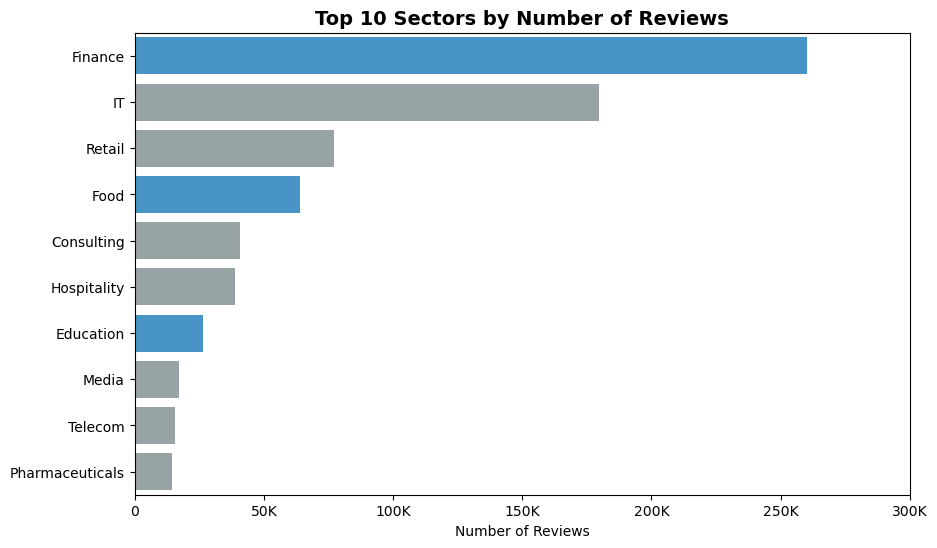

In [459]:
#1. top 10 total reviews
sector_summary_plot = sector_summary.copy()
sector_summary_plot['count'] = sector_summary_plot['count'] / 1000  # convert to thousands
plt.figure(figsize=(10,6))
sns.barplot(
    data=sector_summary_plot.head(10), 
    x='count', 
    y='sector', 
    palette = ['#3498db', '#95a5a6','#95a5a6', '#3498db',  '#95a5a6', '#95a5a6', '#3498db', '#95a5a6', '#95a5a6', '#95a5a6'  ]
)

plt.title('Top 10 Sectors by Number of Reviews', fontsize=14, weight='bold')
plt.xlabel('Number of Reviews')
plt.ylabel('')
ticks = plt.xticks()[0]
plt.xticks(ticks, [f'{int(x)}K' if x!=0 else '0' for x in ticks])
plt.show()

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> Average Overall Rating Visualization </h2>
</div>

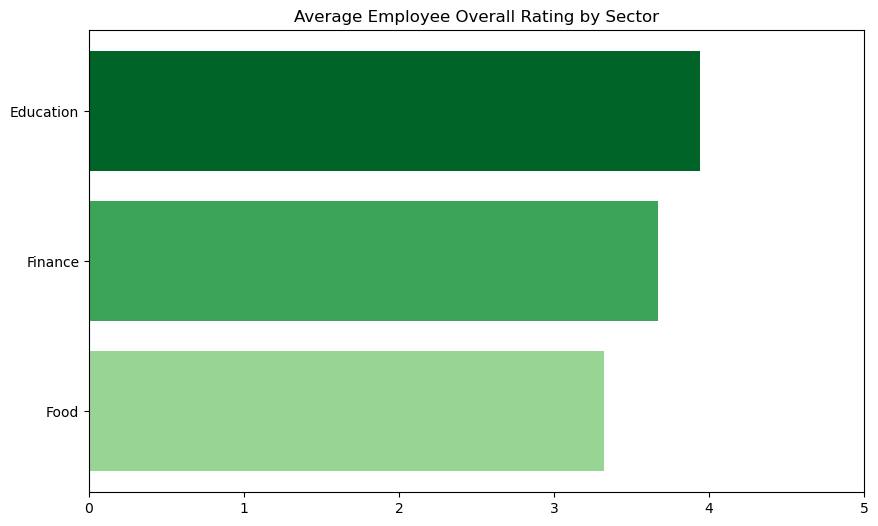

In [415]:
# Select only the sectors of interest
sector_filtered = sector_pivot.loc[selected_sectors].sort_values(by='overall_rating', ascending=True)

# Create a gradient of green shades (darkest for the highest bar)
colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(sector_filtered)))

# Horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(sector_filtered.index, sector_filtered['overall_rating'], color=colors)
plt.xlabel('')
plt.ylabel('')
plt.title('Average Employee Overall Rating by Sector')
plt.xlim(0,5)  # Set x-axis from 0 to 5
plt.show()

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> % CEO Approval Visualization </h2>
</div>

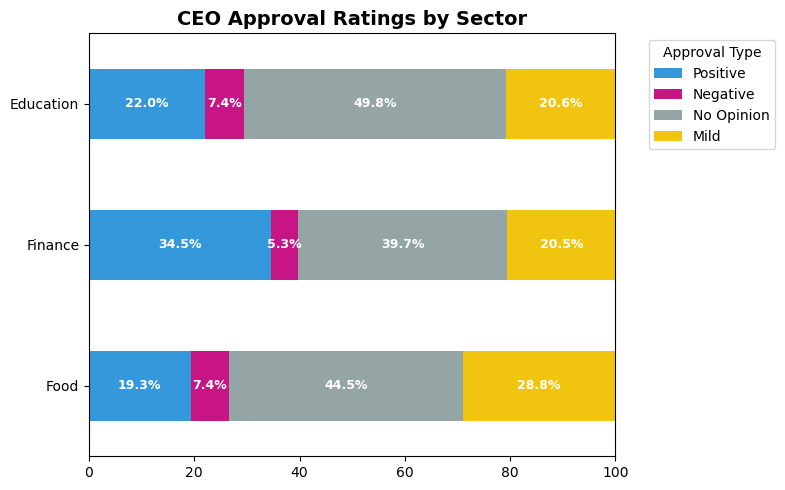

In [461]:
ceo_plot= ceo_by_sector.loc[selected_sectors, ['Positive_%', 'Negative_%', 'No_opinion_%', 'mild_%']]
# Plot grouped bar chart
ceo_plot.plot(kind='barh', stacked=True,figsize=(8,5), color=['#3498db', '#c71585','#95a5a6', '#f1c40f'])
plt.title('CEO Approval Ratings by Sector', fontsize=14, weight='bold')
plt.ylabel('')
plt.xlabel('')
plt.legend(title='Approval Type', labels=['Positive', 'Negative', 'No Opinion', 'Mild'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 100)
plt.tight_layout()
# Add percentage labels
for i, (index, row) in enumerate(ceo_plot.iterrows()):
    cumulative = 0
    for value in row:
        if value > 3:  # show only if > 3% to avoid clutter
            plt.text(cumulative + value/2, i, f'{value:.1f}%', ha='center', va='center', color='white', fontsize=9, fontweight='bold')
        cumulative += value
plt.show()



<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> % Employee Recommendation Visualization </h2>
</div>

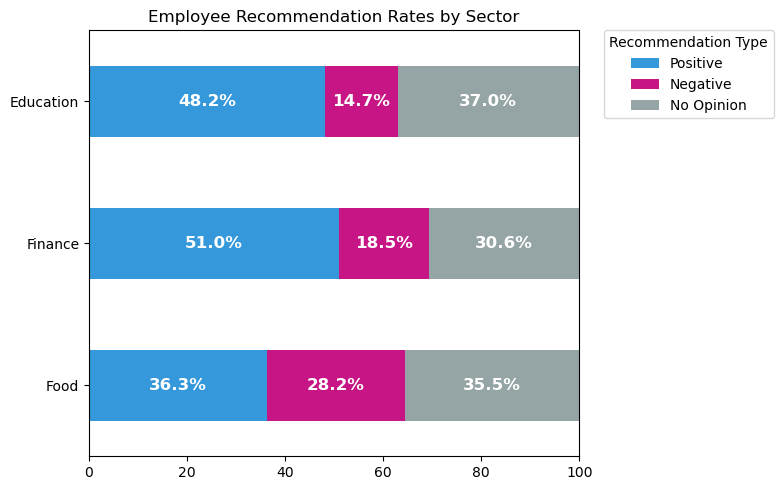

In [483]:
filtered_rec = recommend_by_sector.loc[selected_sectors, ['Positive_%', 'Negative_%', 'No_opinion_%']]

# Plot grouped bar chart
filtered_rec.plot(kind='barh', stacked=True,figsize=(8,5), color=['#3498db', '#c71585', '#95a5a6'])

plt.title('Employee Recommendation Rates by Sector')
plt.ylabel('')
plt.xlabel('')
plt.xlim(0, 100)

# Add legend with clear labels and position it outside the plot
plt.legend(
    title='Recommendation Type',
    labels=['Positive', 'Negative', 'No Opinion'],
    bbox_to_anchor=(1.05, 1),  # move outside to the right
    loc='upper left',
    borderaxespad=0
)
# Add percentage labels
for i, (index, row) in enumerate(filtered_rec.iterrows()):
    cumulative = 0
    for value in row:
        if value > 3:  # avoid clutter for very small values
            plt.text(cumulative + value/2, i, f'{value:.1f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
        cumulative += value
plt.tight_layout()
plt.show()

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> AV work life balance Visualization </h2>
</div>

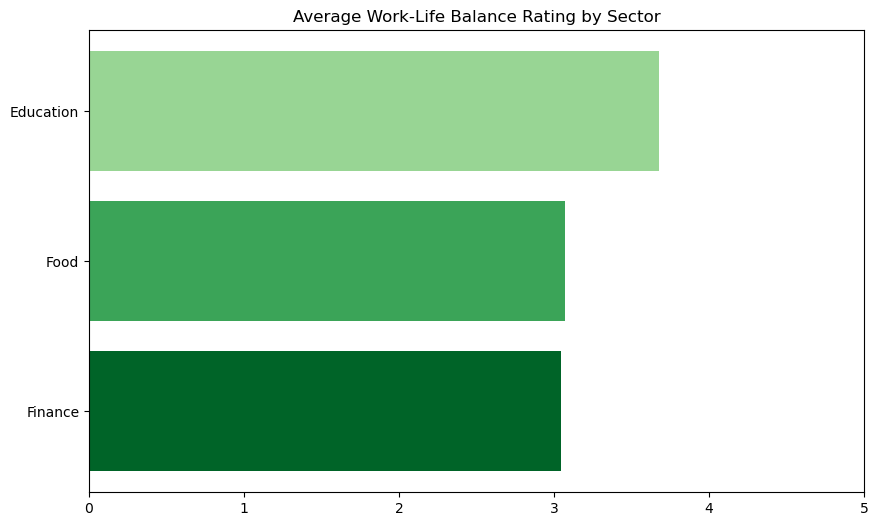

In [469]:
# Desired order
desired_order = ['Education', 'Food', 'Finance']

# Select and reorder
sector_filtered = work_life_sector.loc[selected_sectors, ['work_life_balance']].reindex(desired_order)

# Create gradient of green shades (darkest for the highest value)
colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(sector_filtered)))

# Horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(sector_filtered.index, sector_filtered['work_life_balance'], color=colors)
plt.xlabel('')
plt.ylabel('')
plt.title('Average Work-Life Balance Rating by Sector')
plt.xlim(0,5)  # Set x-axis from 0 to 5
plt.gca().invert_yaxis()
plt.show()

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> AV  company culture rating Visualization </h2>
</div>

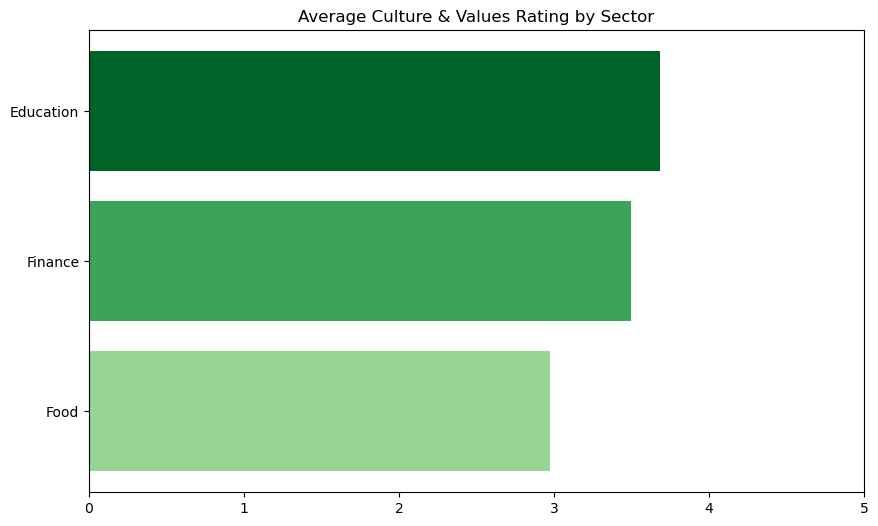

In [423]:
# Select only the sectors of interest
sector_filtered = culture_values_sector.loc[selected_sectors, ['culture_values']]

# Create a gradient of green shades (darkest for the highest bar)
colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(sector_filtered)))

# Horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(sector_filtered.index, sector_filtered['culture_values'], color=colors)
plt.xlabel('')
plt.ylabel('')
plt.title('Average Culture & Values Rating by Sector')
plt.xlim(0,5)  # Set x-axis from 0 to 5
plt.show()

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> % of Anonymous Employees Visualization </h2>
</div>

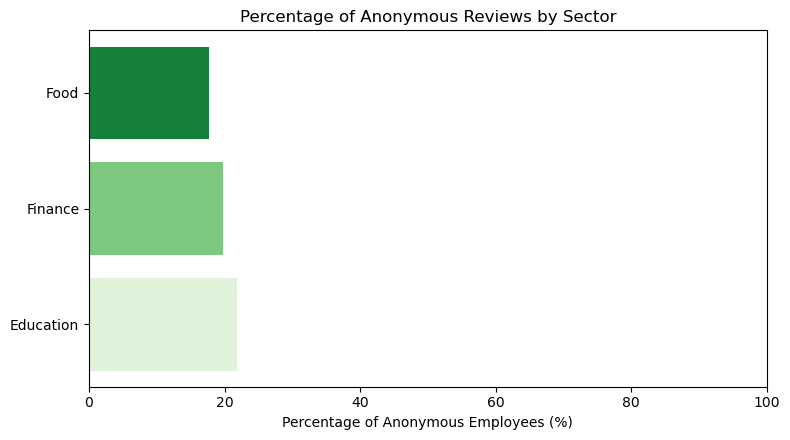

In [475]:
# Prepare the data: keep only the 3 selected sectors and sort by anon_% ascending
sector_filtered = anon_summary.set_index('sector').loc[selected_sectors]
sorted_df = sector_filtered.sort_values('anon_%', ascending=True)  # lowest anon_% first

# Create a reversed green colormap so low values are dark and high values are light
cmap = plt.cm.Greens_r  # reversed Greens: dark -> light as value increases
colors = cmap(np.linspace(0.2, 0.85, len(sorted_df)))  # tweak range for preferred darkness

# Plot
plt.figure(figsize=(8,4.5))
plt.barh(sorted_df.index, sorted_df['anon_%'], color=colors)
plt.xlabel('Percentage of Anonymous Employees (%)')
plt.title('Percentage of Anonymous Reviews by Sector')
plt.xlim(0, 100)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> AV career advancement opportunities rating Visualization </h2>
</div>

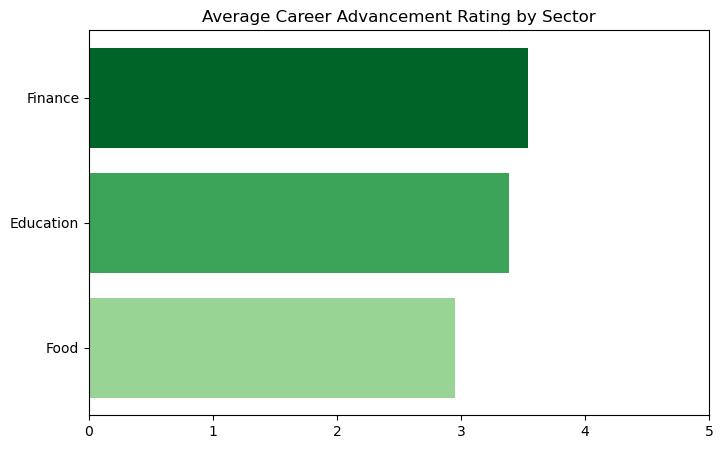

In [427]:
# Select and sort by value (highest first)
sector_filtered = career_sector.loc[selected_sectors, ['career_opp']].sort_values(by='career_opp', ascending=False)

# Create a gradient of green shades (darkest = highest)
colors = plt.cm.Greens(np.linspace(0.9, 0.4, len(sector_filtered)))  # 0.9 = dark, 0.4 = light

# Plot horizontal bar chart
plt.figure(figsize=(8,5))
plt.barh(sector_filtered.index, sector_filtered['career_opp'], color=colors)
plt.xlabel('')
plt.ylabel('')
plt.title('Average Career Advancement Rating by Sector')
plt.xlim(0,5)
plt.gca().invert_yaxis()
plt.show()

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> AV compensation and benefits rating Visualization  </h2>
</div>

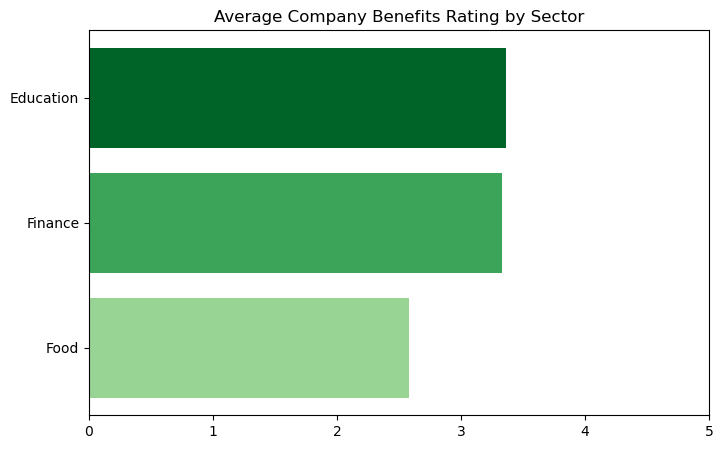

In [429]:
# Sort by value (highest first)
sector_filtered = benefits_sector.loc[selected_sectors, ['comp_benefits']].sort_values(by='comp_benefits', ascending=False)

# Create a gradient (darkest for highest)
colors = plt.cm.Greens(np.linspace(0.9, 0.4, len(sector_filtered)))

# Plot horizontal bar chart
plt.figure(figsize=(8,5))
plt.barh(sector_filtered.index, sector_filtered['comp_benefits'], color=colors)
plt.xlabel('')
plt.ylabel('')
plt.title('Average Company Benefits Rating by Sector')
plt.xlim(0,5)

# Reverse the order of y-axis so highest is at top
plt.gca().invert_yaxis()

plt.show()

<div style=" padding:9px; border-left:4px solid #40916c; border-radius:3px;">
            <h2 style=" color:#00A562; font-size:16px;"> Senior management performance Visualization </h2>
</div>

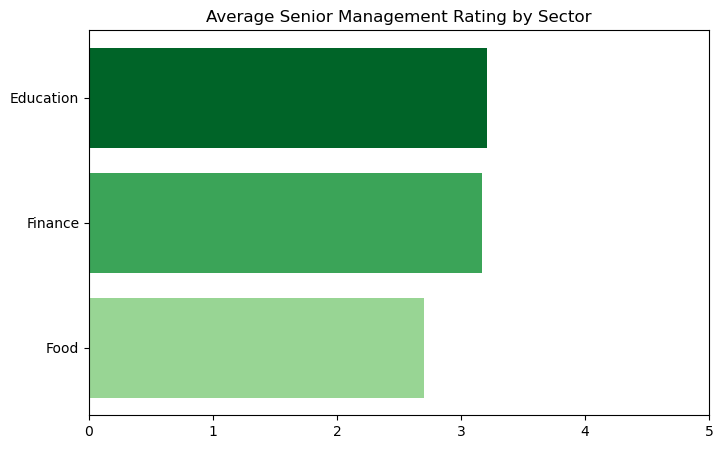

In [431]:
# Sort by value descending (highest first)
sector_filtered = senior_sector.loc[selected_sectors, ['senior_mgmt']].sort_values(by='senior_mgmt', ascending=False)

# Create gradient (darkest for highest)
colors = plt.cm.Greens(np.linspace(0.9, 0.4, len(sector_filtered)))

# Plot horizontal bar chart
plt.figure(figsize=(8,5))
plt.barh(sector_filtered.index, sector_filtered['senior_mgmt'], color=colors)
plt.xlabel('')
plt.ylabel('')
plt.title('Average Senior Management Rating by Sector')
plt.xlim(0,5)

# Reverse y-axis so highest is on top
plt.gca().invert_yaxis()

plt.show()

<div style="padding:15px; border-left:6px solid #40916c; border-radius:4px;">
  <h1 style="margin-top:0; color:#2c3e50;">7. Insights and Key Findings</h1>
  <p style="font-size:16px;">Here we summarize the main insights discovered during our analysis:</p>
  <ul style="font-size:16px;">
    <li>Education sector has the highest overall satisfaction (3.94/5), strong culture, and leadership support.</li>
    <li>Finance offers career growth and structure but lower work-life balance.</li>
    <li>Food sector scores lowest across most metrics, mainly due to management and workload issues.</li>
    <li>Anonymous reviews are more common in Education, possibly due to sensitive feedback culture.</li>
 <p></p>
    
     📊 Overall, Education is the best-rated sector to work in, while Finance suits those focused on career growth.
      
  </ul>
</div>

In [509]:
# Data
data = {
    "Metric": [
        "Overall Rating",
        "Recommend Positive %",
        "CEO Approval Positive %",
        "Work-Life Balance",
        "Culture & Values",
        "% Anonymous Employees",
        "Career Opportunities",
        "Company Benefits",
        "Senior Management Ratings"
    ],
    "Food": [
        "3.32 🔴", "36.3 🔴", "19.3 🔴", "3.07 🟡", "2.98 🔴", "17.7 🟢", "2.95 🔴", "2.58 🔴", "2.71 🔴"
    ],
    "Finance": [
        "3.67 🟡", "50.95 🟢", "34.51 🟢", "3.04 🔴", "3.49 🟡", "19.7 🟡", "3.54 🟢", "3.33 🟡", "3.17 🟡"
    ],
    "Education": [
        "3.94 🟢", "48.22 🟡", "22.0 🟡", "3.68 🟢", "3.68 🟢", "21.8 🔴", "3.39 🟡", "3.36 🟢", "3.21 🟢"
    ],
    "Best": [
        "Education", "Finance", "Finance", "Education", "Education", "Food", "Finance", "Education", "Education"
    ]
}

# Create DataFrame
df_table = pd.DataFrame(data)

# Display nicely
display(df_table)

,Metric,Food,Finance,Education,Best
0,Overall Rating,3.32 🔴,3.67 🟡,3.94 🟢,Education
1,Recommend Positive %,36.3 🔴,50.95 🟢,48.22 🟡,Finance
2,CEO Approval Positive %,19.3 🔴,34.51 🟢,22.0 🟡,Finance
3,Work-Life Balance,3.07 🟡,3.04 🔴,3.68 🟢,Education
4,Culture & Values,2.98 🔴,3.49 🟡,3.68 🟢,Education
5,% Anonymous Employees,17.7 🟢,19.7 🟡,21.8 🔴,Food
6,Career Opportunities,2.95 🔴,3.54 🟢,3.39 🟡,Finance
7,Company Benefits,2.58 🔴,3.33 🟡,3.36 🟢,Education
8,Senior Management Ratings,2.71 🔴,3.17 🟡,3.21 🟢,Education


<div style=" padding:15px; border-left:6px solid #40916c; border-radius:4px;">
  <h1 style="margin-top:0; color:#2c3e50;"> 8. Conclusion</h1>
    <p style="font-size:16px;">
      This analysis highlights how employee experiences differ across industries (2008–2021).
Education stands out as the most balanced and satisfying sector, Finance as career-focused but demanding, and Food as the least favorable.


</div>
